# Initial Exploration 

## Import Libraries

In [1]:
#Disable Warnings
import warnings
warnings.filterwarnings("ignore")

#Import pandas for dataframes
import pandas as pd
import numpy as np

#Graphing imports
import seaborn as sns
import matplotlib.pyplot as plt

#Import Simple Imputer
from sklearn.impute import SimpleImputer

from scipy import stats

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest, f_regression, RFE

from sklearn.linear_model import LinearRegression

#sklearn imports 
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


## Acquire Data

In [2]:
df = pd.read_csv(r'/Users/malachihale/codeup-data-science/hotel_bookings_project/hotel_bookings.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.columns.to_list()

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [5]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [6]:
for col in df.columns:
    print(df[col].value_counts())

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
0    75166
1    44224
Name: is_canceled, dtype: int64
0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
370       1
435       1
371       1
380       1
709       1
Name: lead_time, Length: 479, dtype: int64
2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64
33    3580
30    3087
32    3045
34    3040
18    2926
21    2854
28    2853
17    2805
20    2785
29    2763
42    2756
31    2741
41    2699
15    2689
27    2664
25    2663
38    2661
23    2621
35    2593
39    2581
22    2546
24    2498
13    2416
16    2405
19    2402
40    2397
26    2391
43    2352
44    2272
14    2264
37    2229
8     2216
36

## Prepare Data

In [7]:
def handle_missing_values(df, prop_required_column = .5, prop_required_row = .75):
    '''
    We will eliminate all columns with less than 50% non-null, and all rows with less than 75% non-null.
    '''
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [8]:
def impute_null_values(df):
    '''
    We will use SimpleImputer to impute the mean value into the null values into each column.
    '''
    #We will use the mean imputer function.
    imputer = SimpleImputer(strategy='most_frequent')

    #We will create a for loop that will impute all the null values in each one of our columns.
    for col in df.columns:
        df[[col]] = imputer.fit_transform(df[[col]])
    
    return df

In [9]:
df = handle_missing_values(df)

In [10]:
df = impute_null_values(df)

In [11]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,9.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [12]:
df.shape

(119390, 31)

In [13]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [14]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,9.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [15]:
pd.set_option('display.max_colwidth', None)

In [16]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,9.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [17]:
df['date_arrived'] = df["arrival_date_year"].astype(str) + str(" ") + df["arrival_date_month"] + str(" ") + df["arrival_date_day_of_month"].astype(str)

In [18]:
df.date_arrived

0            2015 July 1
1            2015 July 1
2            2015 July 1
3            2015 July 1
4            2015 July 1
               ...      
119385    2017 August 30
119386    2017 August 31
119387    2017 August 31
119388    2017 August 31
119389    2017 August 29
Name: date_arrived, Length: 119390, dtype: object

In [19]:
df['date_arrived'] = pd.to_datetime(df['date_arrived'])

In [20]:
df.date_arrived

0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: date_arrived, Length: 119390, dtype: datetime64[ns]

In [21]:
def split_data(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames.
    return train, validate, test DataFrames.
    '''
    
    # splits df into train_validate and test using train_test_split() stratifying on churn to get an even mix of each churn, yes or no
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    
    # splits train_validate into train and validate using train_test_split() stratifying on churn to get an even mix of each churn
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123)
    return train, validate, test

In [22]:
train, validate, test = split_data(df)

In [23]:
train.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date_arrived
43920,City Hotel,1,87,2015,September,39,25,2,3,2,...,Non Refund,1.0,0,Transient,170.0,0,0,Canceled,2015-09-09,2015-09-25
3642,Resort Hotel,0,49,2015,December,53,28,1,3,2,...,No Deposit,240.0,0,Transient,89.5,1,2,Check-Out,2016-01-01,2015-12-28
27542,Resort Hotel,0,89,2016,August,36,29,1,3,2,...,No Deposit,242.0,0,Transient,183.5,0,1,Check-Out,2016-09-02,2016-08-29
110598,City Hotel,0,294,2017,April,17,28,0,1,2,...,No Deposit,9.0,0,Transient,99.0,0,1,Check-Out,2017-04-29,2017-04-28
74449,City Hotel,1,304,2015,August,34,17,1,1,2,...,Non Refund,1.0,0,Contract,62.0,0,0,Canceled,2015-01-01,2015-08-17


## Exploration

In [24]:
for col in df.columns:
    print(df[col].value_counts())

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
0    75166
1    44224
Name: is_canceled, dtype: int64
0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
370       1
435       1
371       1
380       1
709       1
Name: lead_time, Length: 479, dtype: int64
2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64
33    3580
30    3087
32    3045
34    3040
18    2926
21    2854
28    2853
17    2805
20    2785
29    2763
42    2756
31    2741
41    2699
15    2689
27    2664
25    2663
38    2661
23    2621
35    2593
39    2581
22    2546
24    2498
13    2416
16    2405
19    2402
40    2397
26    2391
43    2352
44    2272
14    2264
37    2229
8     2216
36

In [25]:
categorical = ['hotel', 
               'is_canceled', 
               'arrival_date_year', 
               'arrival_date_month', 
                'meal', 
              'country', 
              'market_segment', 
              'distribution_channel', 
              'is_repeated_guest', 
              'reserved_room_type', 
              'assigned_room_type', 
              'deposit_type',
              'agent',
              'customer_type', 
              'required_car_parking_spaces', 
              'reservation_status',
              'arrival_date_week_number',
                'arrival_date_day_of_month',
              'total_of_special_requests']

In [26]:
continuous = ['lead_time',
             'stays_in_weekend_nights',
           'stays_in_week_nights',
            'adults',
              'children',
              'babies',
            'previous_cancellations',
              'previous_bookings_not_canceled',
              'booking_changes',
              'days_in_waiting_list',
             ]

In [27]:
dates = ['reservation_status_date', 
        'date_arrived']

In [28]:
for col in continuous:
    test_results = stats.pearsonr(train.adr, train[col])
    print(col, "correlation with daily rate")
    print(test_results)
    print(" ")

lead_time correlation with daily rate
(-0.06360019511957397, 6.94673424302412e-61)
 
stays_in_weekend_nights correlation with daily rate
(0.048688909963678625, 2.202071121463805e-36)
 
stays_in_week_nights correlation with daily rate
(0.05999294614060785, 2.312993798562837e-54)
 
adults correlation with daily rate
(0.2288320597451874, 0.0)
 
children correlation with daily rate
(0.30691703269270615, 0.0)
 
babies correlation with daily rate
(0.0266142060290196, 5.872749916106974e-12)
 
previous_cancellations correlation with daily rate
(-0.06220990055484778, 2.516027186592958e-58)
 
previous_bookings_not_canceled correlation with daily rate
(-0.06967613962130542, 9.858658835151844e-73)
 
booking_changes correlation with daily rate
(0.018860630830353272, 1.076461278740261e-06)
 
days_in_waiting_list correlation with daily rate
(-0.037838782319251016, 1.2770568431633983e-22)
 


In [29]:
categorical

['hotel',
 'is_canceled',
 'arrival_date_year',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'agent',
 'customer_type',
 'required_car_parking_spaces',
 'reservation_status',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'total_of_special_requests']

### Hotel Type

In [30]:
train.hotel.value_counts()

City Hotel      44543
Resort Hotel    22315
Name: hotel, dtype: int64

In [31]:
city_hotel = train[train.hotel == 'City Hotel']
resort_hotel = train[train.hotel == "Resort Hotel"]

In [32]:
test_results = stats.ttest_ind(city_hotel.adr, resort_hotel.adr)
test_results

Ttest_indResult(statistic=24.3645011176397, pvalue=1.515001128004243e-130)

In [33]:
for col in categorical:
    print(train[col].value_counts())
    print(" ")

City Hotel      44543
Resort Hotel    22315
Name: hotel, dtype: int64
 
0    42197
1    24661
Name: is_canceled, dtype: int64
 
2016    31744
2017    22761
2015    12353
Name: arrival_date_year, dtype: int64
 
August       7725
July         7124
May          6529
October      6207
April        6179
June         6174
September    5889
March        5417
February     4575
November     3891
December     3773
January      3375
Name: arrival_date_month, dtype: int64
 
BB           51766
HB            8011
SC            6002
Undefined      643
FB             436
Name: meal, dtype: int64
 
PRT    27553
GBR     6693
FRA     5863
ESP     4840
DEU     4040
       ...  
TGO        1
PYF        1
FJI        1
NIC        1
NAM        1
Name: country, Length: 163, dtype: int64
 
Online TA        31737
Offline TA/TO    13565
Groups           10973
Direct            7029
Corporate         2998
Complementary      415
Aviation           139
Undefined            2
Name: market_segment, dtype: int64
 
TA/T

### Canceled

In [34]:
not_canceled = train[train.is_canceled == 0]
canceled = train[train.is_canceled == 1]

In [35]:
test_results = stats.ttest_ind(not_canceled.adr, canceled.adr)
test_results

Ttest_indResult(statistic=-11.842905472579185, pvalue=2.5231057668841014e-32)

### Arrived

In [36]:
arrived_2015 = train[train.arrival_date_year == 2015]
arrived_2016 = train[train.arrival_date_year == 2016]
arrived_2017 = train[train.arrival_date_year == 2017]

In [37]:
test_results = stats.ttest_1samp(arrived_2015.adr, train.adr.mean())
test_results

Ttest_1sampResult(statistic=-37.66847294275936, pvalue=4.8384386985830036e-294)

In [38]:
test_results = stats.ttest_1samp(arrived_2016.adr, train.adr.mean())
test_results

Ttest_1sampResult(statistic=-11.150751895195732, pvalue=8.032855099383927e-29)

In [39]:
test_results = stats.ttest_1samp(arrived_2017.adr, train.adr.mean())
test_results

Ttest_1sampResult(statistic=36.638993581686144, pvalue=1.3214760666002303e-285)

### Month

In [40]:
months = train.arrival_date_month.unique()

In [41]:
list_of_months = list(months)

In [42]:
for month in list_of_months:
    print(month)
    print(stats.ttest_1samp(train[train.arrival_date_month == month].adr, train.adr.mean()))
    print(" ")


September
Ttest_1sampResult(statistic=6.232005393097418, pvalue=4.924204540703545e-10)
 
December
Ttest_1sampResult(statistic=-28.050605358619908, pvalue=2.0421508792209118e-157)
 
August
Ttest_1sampResult(statistic=53.9788186544037, pvalue=0.0)
 
April
Ttest_1sampResult(statistic=-3.18384321238499, pvalue=0.0014605510489305352)
 
October
Ttest_1sampResult(statistic=-30.198211258121244, pvalue=4.922906525488024e-187)
 
July
Ttest_1sampResult(statistic=40.496518325457075, pvalue=0.0)
 
January
Ttest_1sampResult(statistic=-64.02277236105576, pvalue=0.0)
 
November
Ttest_1sampResult(statistic=-54.065961386804666, pvalue=0.0)
 
February
Ttest_1sampResult(statistic=-62.98372197747219, pvalue=0.0)
 
March
Ttest_1sampResult(statistic=-18.659303090838705, pvalue=2.3442075886511354e-75)
 
June
Ttest_1sampResult(statistic=30.138343623794484, pvalue=2.7631178387698705e-186)
 
May
Ttest_1sampResult(statistic=13.013940711677614, pvalue=3.0401145234314255e-38)
 


In [43]:
def one_sample_test(feature):
    first_array = train[feature].unique()
    first_list = list(first_array)
    
    for col in first_list:
        print(col)
        print(stats.ttest_1samp(train[train[feature] == col].adr, train.adr.mean()))
        print(" ")

### Meal

In [44]:
one_sample_test('meal')

BB
Ttest_1sampResult(statistic=-10.739878236329545, pvalue=7.059174089797693e-27)
 
SC
Ttest_1sampResult(statistic=-9.447213650800142, pvalue=4.868945778422467e-21)
 
HB
Ttest_1sampResult(statistic=29.433317961501547, pvalue=6.762498559896371e-181)
 
Undefined
Ttest_1sampResult(statistic=-4.160519991340183, pvalue=3.607609517928183e-05)
 
FB
Ttest_1sampResult(statistic=1.8855966819016665, pvalue=0.06001542958006228)
 


In [45]:
for element in categorical: 
    print(element)
    one_sample_test(element)
    print(" ")

hotel
City Hotel
Ttest_1sampResult(statistic=15.712200096386113, pvalue=1.7592664642776677e-55)
 
Resort Hotel
Ttest_1sampResult(statistic=-16.843202927918025, pvalue=2.895967658105495e-63)
 
 
is_canceled
1
Ttest_1sampResult(statistic=8.604386543953076, pvalue=8.122212268028148e-18)
 
0
Ttest_1sampResult(statistic=-7.642825572519328, pvalue=2.1699028373856572e-14)
 
 
arrival_date_year
2015
Ttest_1sampResult(statistic=-37.66847294275936, pvalue=4.8384386985830036e-294)
 
2016
Ttest_1sampResult(statistic=-11.150751895195732, pvalue=8.032855099383927e-29)
 
2017
Ttest_1sampResult(statistic=36.638993581686144, pvalue=1.3214760666002303e-285)
 
 
arrival_date_month
September
Ttest_1sampResult(statistic=6.232005393097418, pvalue=4.924204540703545e-10)
 
December
Ttest_1sampResult(statistic=-28.050605358619908, pvalue=2.0421508792209118e-157)
 
August
Ttest_1sampResult(statistic=53.9788186544037, pvalue=0.0)
 
April
Ttest_1sampResult(statistic=-3.18384321238499, pvalue=0.0014605510489305352

Ttest_1sampResult(statistic=-0.1349677824642483, pvalue=0.9011839309319294)
 
EGY
Ttest_1sampResult(statistic=0.8243239443793211, pvalue=0.41902026963719574)
 
GEO
Ttest_1sampResult(statistic=2.4913788990963237, pvalue=0.03434421819228226)
 
THA
Ttest_1sampResult(statistic=1.574198009406763, pvalue=0.12667458969680967)
 
LKA
Ttest_1sampResult(statistic=-1.1201376485344068, pvalue=0.46396446214656983)
 
BIH
Ttest_1sampResult(statistic=0.2106493192621282, pvalue=0.8384273827076364)
 
KWT
Ttest_1sampResult(statistic=2.772856865195988, pvalue=0.02165213665553604)
 
PER
Ttest_1sampResult(statistic=1.2320195594885468, pvalue=0.2337940472074269)
 
TJK
Ttest_1sampResult(statistic=4.768959744824768, pvalue=0.008846823341739283)
 
MDV
Ttest_1sampResult(statistic=-0.2510108410097106, pvalue=0.8141728175468482)
 
MYS
Ttest_1sampResult(statistic=-5.175751601202044, pvalue=0.00017847038379049438)
 
MUS
Ttest_1sampResult(statistic=-2.5454275197993392, pvalue=0.2383104817793428)
 
VNM
Ttest_1sampResul

Ttest_1sampResult(statistic=-27.615207649067678, pvalue=1.7418027230417523e-123)
 
241.0
Ttest_1sampResult(statistic=-1.4425178386906818, pvalue=0.1494856012087139)
 
8.0
Ttest_1sampResult(statistic=3.884327292561157, pvalue=0.0001105909852451174)
 
4.0
Ttest_1sampResult(statistic=-4.618817777894197, pvalue=0.00013309497704997955)
 
68.0
Ttest_1sampResult(statistic=-19.277691879612966, pvalue=6.576902705975676e-37)
 
42.0
Ttest_1sampResult(statistic=-5.9000434392086, pvalue=3.442069311902888e-08)
 
236.0
Ttest_1sampResult(statistic=34.455538646398324, pvalue=2.7352443432753073e-72)
 
85.0
Ttest_1sampResult(statistic=-17.343662058274592, pvalue=1.4279755214821515e-47)
 
350.0
Ttest_1sampResult(statistic=-8.057253411802506, pvalue=2.068038789041298e-06)
 
22.0
Ttest_1sampResult(statistic=-11.801268466757211, pvalue=2.871253469167604e-25)
 
77.0
Ttest_1sampResult(statistic=-0.2562259077291154, pvalue=0.8003934598358101)
 
14.0
Ttest_1sampResult(statistic=23.405175947191783, pvalue=1.48253

Ttest_1sampResult(statistic=-0.19401023042154017, pvalue=0.847394230719913)
 
375.0
Ttest_1sampResult(statistic=-14.86787479536797, pvalue=6.404256319576965e-14)
 
156.0
Ttest_1sampResult(statistic=-8.880097787515272, pvalue=7.905253755234542e-14)
 
155.0
Ttest_1sampResult(statistic=-4.927928760902748, pvalue=9.52929440386004e-06)
 
146.0
Ttest_1sampResult(statistic=-18.421873219675454, pvalue=1.6988782995312654e-27)
 
276.0
Ttest_1sampResult(statistic=-inf, pvalue=0.0)
 
31.0
Ttest_1sampResult(statistic=4.587697491126709, pvalue=1.4123303271538797e-05)
 
71.0
Ttest_1sampResult(statistic=-5.294853753507884, pvalue=4.067672855944083e-06)
 
310.0
Ttest_1sampResult(statistic=-3.6194780401418285, pvalue=0.004030142655150108)
 
526.0
Ttest_1sampResult(statistic=0.33522183331830646, pvalue=0.7510647865689619)
 
444.0
Ttest_1sampResult(statistic=nan, pvalue=nan)
 
387.0
Ttest_1sampResult(statistic=-5.225049857420357, pvalue=3.0602274742590064e-05)
 
95.0
Ttest_1sampResult(statistic=-6.7056901

Ttest_1sampResult(statistic=0.690715971101704, pvalue=0.507165305784993)
 
368.0
Ttest_1sampResult(statistic=-17.154551642728247, pvalue=5.253277050340041e-18)
 
45.0
Ttest_1sampResult(statistic=-20.924932909006294, pvalue=4.76051433819948e-13)
 
282.0
Ttest_1sampResult(statistic=nan, pvalue=nan)
 
121.0
Ttest_1sampResult(statistic=-15.433181523867399, pvalue=1.2979309553605877e-10)
 
426.0
Ttest_1sampResult(statistic=26.03069643173509, pvalue=0.02444448138012015)
 
474.0
Ttest_1sampResult(statistic=3.9767285132847947, pvalue=0.004080326310475187)
 
535.0
Ttest_1sampResult(statistic=nan, pvalue=nan)
 
429.0
Ttest_1sampResult(statistic=-0.06381052393722854, pvalue=0.9594319605347743)
 
492.0
Ttest_1sampResult(statistic=-5.018774555774218, pvalue=0.0005226812047842712)
 
328.0
Ttest_1sampResult(statistic=-153.7161323252202, pvalue=1.074362726510313e-08)
 
335.0
Ttest_1sampResult(statistic=-inf, pvalue=0.0)
 
475.0
Ttest_1sampResult(statistic=inf, pvalue=0.0)
 
78.0
Ttest_1sampResult(stat

Ttest_1sampResult(statistic=-27.490176216870537, pvalue=8.445818630318131e-103)
 
52
Ttest_1sampResult(statistic=-22.481229215352485, pvalue=1.0211780821573958e-83)
 
8
Ttest_1sampResult(statistic=-31.02932817098526, pvalue=1.8277660529743514e-156)
 
22
Ttest_1sampResult(statistic=10.033799669168374, pvalue=6.039070362011826e-23)
 
3
Ttest_1sampResult(statistic=-34.890840494582385, pvalue=1.6172348796680916e-159)
 
31
Ttest_1sampResult(statistic=26.016289546962742, pvalue=8.0850506530765e-124)
 
32
Ttest_1sampResult(statistic=23.137530752384894, pvalue=4.850763795856957e-103)
 
20
Ttest_1sampResult(statistic=8.237735385942418, pvalue=3.728115004708029e-16)
 
9
Ttest_1sampResult(statistic=-31.438894627286917, pvalue=1.9647491738229295e-158)
 
13
Ttest_1sampResult(statistic=-1.5099752835308988, pvalue=0.13128672253277446)
 
43
Ttest_1sampResult(statistic=-13.174912913363235, pvalue=2.5474826312623932e-37)
 
24
Ttest_1sampResult(statistic=14.96764548712343, pvalue=4.507000328695363e-47)
 

Every categorical features has some variables which differ signficantly from the avefage in terms of daily rate. Daily rate differs depending on the daily rate of most features. 

In [46]:
def get_continuous_test_results(feature):
    test_results = stats.pearsonr(train.adr, train[feature])
    print(feature)
    print(test_results)
    print(" ")

In [47]:
for element in continuous:
    get_continuous_test_results(element)

lead_time
(-0.06360019511957397, 6.94673424302412e-61)
 
stays_in_weekend_nights
(0.048688909963678625, 2.202071121463805e-36)
 
stays_in_week_nights
(0.05999294614060785, 2.312993798562837e-54)
 
adults
(0.2288320597451874, 0.0)
 
children
(0.30691703269270615, 0.0)
 
babies
(0.0266142060290196, 5.872749916106974e-12)
 
previous_cancellations
(-0.06220990055484778, 2.516027186592958e-58)
 
previous_bookings_not_canceled
(-0.06967613962130542, 9.858658835151844e-73)
 
booking_changes
(0.018860630830353272, 1.076461278740261e-06)
 
days_in_waiting_list
(-0.037838782319251016, 1.2770568431633983e-22)
 


All the continuous features are signficiantly correlated with average daily rate. 

## Feature Engineering

Now that we have determined that most features in the dataset have a statistically signficant relationship with `adr`, we can use feature engineering to determine which features are most associated with `adr`.

In [48]:
train_dummies = pd.get_dummies(train, drop_first = True)

In [49]:
train_dummies

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_I,assigned_room_type_K,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show
43920,1,87,2015,39,25,2,3,2,0.0,0,...,0,0,0,1,0,0,1,0,0,0
3642,0,49,2015,53,28,1,3,2,0.0,0,...,0,0,0,0,0,0,1,0,1,0
27542,0,89,2016,36,29,1,3,2,0.0,0,...,0,0,0,0,0,0,1,0,1,0
110598,0,294,2017,17,28,0,1,2,0.0,0,...,0,0,0,0,0,0,1,0,1,0
74449,1,304,2015,34,17,1,1,2,0.0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10491,1,125,2017,10,9,2,4,2,0.0,0,...,0,0,0,0,0,0,1,0,0,0
54982,1,134,2016,32,1,2,5,3,0.0,0,...,0,0,0,0,0,0,1,0,0,0
51955,0,316,2016,22,26,0,3,2,0.0,0,...,0,0,0,0,0,0,0,1,1,0
35720,0,3,2017,20,15,1,0,2,0.0,0,...,0,0,0,0,0,0,1,0,1,0


In [50]:
X_train_dummies = train_dummies.drop(columns = ["adr", 'reservation_status_date', 'date_arrived'])

In [51]:
y_train_dummies = train_dummies['adr']

### Select K Best

In [52]:
# Create model
kbest_6 = SelectKBest(f_regression, k=6)
#Fit the model
kbest_6.fit(X_train_dummies, y_train_dummies)
X_train_dummies.columns[kbest_6.get_support()]

Index(['adults', 'children', 'arrival_date_month_August',
       'market_segment_Groups', 'market_segment_Online TA',
       'reserved_room_type_F'],
      dtype='object')

In [53]:
# Create model
kbest_20 = SelectKBest(f_regression, k=20)
#Fit the model
kbest_20.fit(X_train_dummies, y_train_dummies)
X_train_dummies.columns[kbest_20.get_support()]

Index(['arrival_date_year', 'adults', 'children', 'total_of_special_requests',
       'arrival_date_month_August', 'arrival_date_month_February',
       'arrival_date_month_January', 'arrival_date_month_July', 'country_PRT',
       'market_segment_Complementary', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'reserved_room_type_D', 'reserved_room_type_F', 'reserved_room_type_G',
       'assigned_room_type_F', 'assigned_room_type_G',
       'customer_type_Transient', 'customer_type_Transient-Party'],
      dtype='object')

In [54]:
# Create model
kbest_30 = SelectKBest(f_regression, k=30)
#Fit the model
kbest_30.fit(X_train_dummies, y_train_dummies)
X_train_dummies.columns[kbest_30.get_support()]

Index(['arrival_date_year', 'adults', 'children', 'is_repeated_guest',
       'total_of_special_requests', 'arrival_date_month_August',
       'arrival_date_month_December', 'arrival_date_month_February',
       'arrival_date_month_January', 'arrival_date_month_July',
       'arrival_date_month_March', 'arrival_date_month_November', 'meal_HB',
       'country_PRT', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'reserved_room_type_C', 'reserved_room_type_D', 'reserved_room_type_E',
       'reserved_room_type_F', 'reserved_room_type_G', 'reserved_room_type_H',
       'assigned_room_type_F', 'assigned_room_type_G', 'assigned_room_type_H',
       'customer_type_Transient', 'customer_type_Transient-Party'],
      dtype='object')

In [55]:
rfe_6 = RFE(estimator=LinearRegression(), n_features_to_select=6)
rfe_6.fit(X_train_dummies, y_train_dummies)
X_train_dummies.columns[rfe_6.get_support()]

Index(['is_canceled', 'country_AIA', 'country_COM', 'country_DJI',
       'market_segment_Complementary', 'reservation_status_Check-Out'],
      dtype='object')

In [56]:
rfe_20 = RFE(estimator=LinearRegression(), n_features_to_select=20)
rfe_20.fit(X_train_dummies, y_train_dummies)
X_train_dummies.columns[rfe_20.get_support()]

Index(['is_canceled', 'country_AIA', 'country_AND', 'country_ATA',
       'country_COM', 'country_DJI', 'country_GAB', 'country_GIB',
       'country_NCL', 'country_PHL', 'country_SYC', 'country_UMI',
       'market_segment_Complementary', 'distribution_channel_Undefined',
       'reserved_room_type_C', 'reserved_room_type_F', 'reserved_room_type_G',
       'reserved_room_type_H', 'assigned_room_type_I',
       'reservation_status_Check-Out'],
      dtype='object')

In [57]:
rfe_30 = RFE(estimator=LinearRegression(), n_features_to_select=30)
rfe_30.fit(X_train_dummies, y_train_dummies)
X_train_dummies.columns[rfe_30.get_support()]

Index(['is_canceled', 'arrival_date_month_August', 'country_AIA',
       'country_AND', 'country_ATA', 'country_COM', 'country_DJI',
       'country_FJI', 'country_GAB', 'country_GIB', 'country_KEN',
       'country_MYS', 'country_NCL', 'country_PHL', 'country_PLW',
       'country_PYF', 'country_SYC', 'country_UMI', 'country_URY',
       'market_segment_Complementary', 'distribution_channel_Undefined',
       'reserved_room_type_C', 'reserved_room_type_F', 'reserved_room_type_G',
       'reserved_room_type_H', 'reserved_room_type_L', 'assigned_room_type_I',
       'assigned_room_type_K', 'assigned_room_type_P',
       'reservation_status_Check-Out'],
      dtype='object')

# Modeling

In [58]:
df_dummies = pd.get_dummies(df, drop_first = True)

In [59]:
train_dummies, validate_dummies, test_dummies = split_data(df_dummies)

In [60]:
X_train_dummies = train_dummies.drop(columns = ["adr", 'reservation_status_date', 'date_arrived'])
X_validate_dummies = validate_dummies.drop(columns = ["adr", 'reservation_status_date', 'date_arrived'])
X_test_dummies = test_dummies.drop(columns = ["adr", 'reservation_status_date', 'date_arrived'])

In [61]:
y_train_dummies = train_dummies['adr']
y_validate_dummies = validate_dummies['adr']
y_test_dummies = test_dummies['adr']

In [62]:
#Convert to DataFrame
y_train_dummies = pd.DataFrame(y_train_dummies)
y_validate_dummies = pd.DataFrame(y_validate_dummies)
y_test_dummies = pd.DataFrame(y_test_dummies)

In [63]:
# Predict taxvaluedollarcnt_pred_mean
adr_pred_mean = y_train_dummies.adr.mean()
y_train_dummies['adr_pred_mean'] = adr_pred_mean
y_validate_dummies['adr_pred_mean'] = adr_pred_mean

In [64]:
# Predict taxvaluedollarcnt_pred_median
adr_pred_median = y_train_dummies.adr.median()
y_train_dummies['adr_pred_median'] = adr_pred_median
y_validate_dummies['adr_pred_median'] = adr_pred_median

In [65]:
# RMSE of taxvaluedollarcnt_pred_mean
rmse_train = mean_squared_error(y_train_dummies.adr, y_train_dummies.adr_pred_mean) ** .5
rmse_validate = mean_squared_error(y_validate_dummies.adr, y_validate_dummies.adr_pred_mean) ** (1/2)
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# RMSE of taxvaluedollarcnt_pred_median
rmse_train = mean_squared_error(y_train_dummies.adr, y_train_dummies.adr_pred_median) ** .5
rmse_validate = mean_squared_error(y_validate_dummies.adr, y_validate_dummies.adr_pred_median) ** .5
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  52.27 
Validate/Out-of-Sample:  48.14
RMSE using Median
Train/In-Sample:  52.72 
Validate/Out-of-Sample:  48.61


## Make DataFrame

In [66]:
from sklearn.metrics import explained_variance_score

In [67]:
def make_metric_df(y, y_pred, model_name, metric_df):
    if metric_df.size ==0:
        metric_df = pd.DataFrame(data=[
            {
                'model': model_name, 
                'RMSE_validate': mean_squared_error(
                    y,
                    y_pred) ** .5,
                'r^2_validate': explained_variance_score(
                    y,
                    y_pred)
            }])
        return metric_df
    else:
        return metric_df.append(
            {
                'model': model_name, 
                'RMSE_validate': mean_squared_error(
                    y,
                    y_pred) ** .5,
                'r^2_validate': explained_variance_score(
                    y,
                    y_pred)
            }, ignore_index=True)

In [68]:
metric_df = pd.DataFrame()
metric_df = make_metric_df(y_validate_dummies.adr,
                           y_validate_dummies.adr_pred_median,
                           'median_baseline',
                          metric_df)

In [69]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,48.612424,0.0


## Linear Regression (OLS)

In [70]:
#Create the model object
lm_1 = LinearRegression(normalize=True)

# fit the model to training data
lm_1.fit(X_train_dummies, y_train_dummies.adr)

y_train_dummies['adr_pred_lm_1'] = lm_1.predict(X_train_dummies)

# evaluate: rmse
rmse_train = mean_squared_error(y_train_dummies.adr, y_train_dummies.adr_pred_lm_1) ** (1/2)

# predict validate
y_validate_dummies['adr_pred_lm_1'] = lm_1.predict(X_validate_dummies)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate_dummies.adr, y_validate_dummies.adr_pred_lm_1) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  36.27609303368945 
Validation/Out-of-Sample:  47269633426385.91


In [71]:
metric_df = metric_df.append({
    'model': 'OLS Regressor', 
    'RMSE_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate_dummies.adr, y_validate_dummies.adr_pred_lm_1)}, ignore_index=True)

In [72]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,4.861242e+01,0.000000e+00
1,OLS Regressor,4.726963e+13,-9.641014e+23


## LassoLars

In [73]:
# create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data.
lars.fit(X_train_dummies, y_train_dummies.adr)

# predict train
y_train_dummies['adr_pred_lars'] = lars.predict(X_train_dummies)

# evaluate: rmse
rmse_train = mean_squared_error(y_train_dummies.adr, y_train_dummies.adr_pred_lars) ** (1/2)

# predict validate
y_validate_dummies['adr_pred_lars'] = lars.predict(X_validate_dummies)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate_dummies.adr, y_validate_dummies.adr_pred_lars) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  52.270398423794504 
Validation/Out-of-Sample:  48.14172177978289


In [74]:
metric_df = make_metric_df(y_validate_dummies.adr, y_validate_dummies.adr_pred_lars,
               'lasso_alpha_1',
               metric_df)

In [75]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,4.861242e+01,0.000000e+00
1,OLS Regressor,4.726963e+13,-9.641014e+23
2,lasso_alpha_1,4.814172e+01,0.000000e+00


## Evaluation 

In [76]:
y_train_dummies.head()

,adr,adr_pred_mean,adr_pred_median,adr_pred_lm_1,adr_pred_lars
43920,170.0,101.886453,95.0,102.625000,101.886453
3642,89.5,101.886453,95.0,83.453125,101.886453
27542,183.5,101.886453,95.0,116.578125,101.886453
110598,99.0,101.886453,95.0,74.171875,101.886453
74449,62.0,101.886453,95.0,89.421875,101.886453


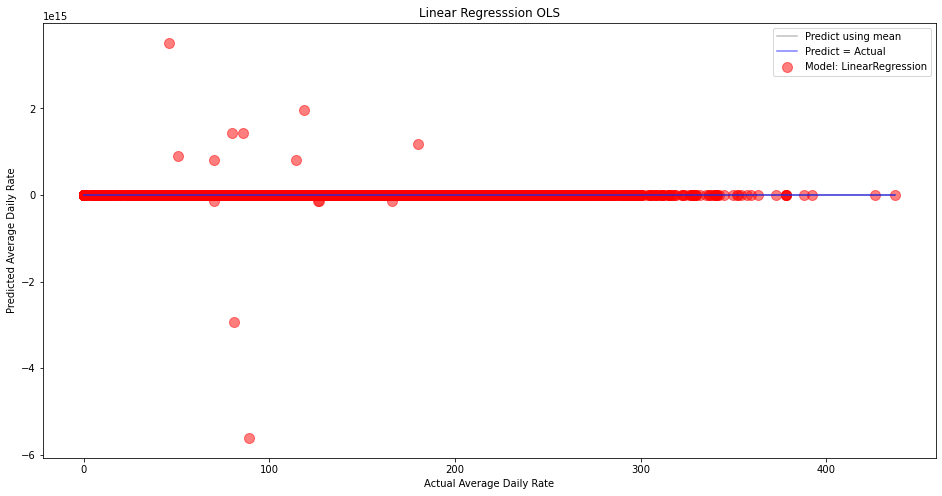

In [77]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate_dummies.adr, y_validate_dummies.adr_pred_mean, alpha=.5, color="gray", label='Predict using mean')
plt.plot(y_validate_dummies.adr, y_validate_dummies.adr, alpha=.5, color="blue", label='Predict = Actual')
plt.scatter(y_validate_dummies.adr, y_validate_dummies.adr_pred_lm_1, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.legend()
plt.xlabel("Actual Average Daily Rate")
plt.ylabel("Predicted Average Daily Rate")
plt.title("Linear Regresssion OLS")
plt.show()

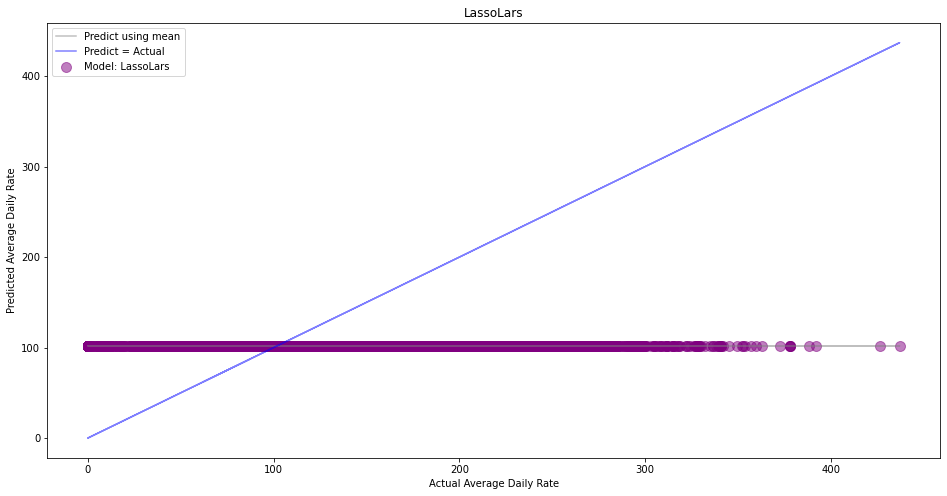

In [78]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate_dummies.adr, y_validate_dummies.adr_pred_mean, alpha=.5, color="gray", label='Predict using mean')
plt.plot(y_validate_dummies.adr, y_validate_dummies.adr, alpha=.5, color="blue", label='Predict = Actual')
plt.scatter(y_validate_dummies.adr, y_validate_dummies.adr_pred_lars, 
            alpha=.5, color="purple", s=100, label="Model: LassoLars")
plt.legend()
plt.xlabel("Actual Average Daily Rate")
plt.ylabel("Predicted Average Daily Rate")
plt.title("LassoLars")
plt.show()